In [1]:
import time
import math
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import dataset
import cv2

from sklearn.metrics import confusion_matrix
from datetime import timedelta

%matplotlib inline

In [2]:
# Convolutional Layer 1.
filter_size1 = 2 
num_filters1 = 32 

# Convolutional Layer 2.
filter_size2 = 2
num_filters2 = 32

# Convolutional Layer 3.
filter_size3 = 2
num_filters3 = 32

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

# Number of color channels for the images: 1 channel for gray-scale.
num_channels = 3

# image dimensions (only squares for now)
img_size = 200

# Size of image when flattened to a single dimension
img_size_flat = img_size * img_size * num_channels

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

In [3]:
# class info
classes = ['Aarthi', 'Akshay', 'Ali', 'Ambresh', 'Amir', 'Amitabh', 'Amrish', 'Anil', 'Annapoorna', 'Anr', 'Anupam', 'Ashwath', 'Avinash', 'Babu', 'Balakrishna', 'Bhanupriya', 'Bharathi', 'Boman', 'Brahmanadam', 'Cochinhaneefa', 'Dileep', 'Dwarkish', 'Farida', 'Hrithik', 'Innocent', 'Jagadeesh', 'Jagapathi', 'Jagathi', 'Jamuna', 'Jayabhaduri', 'Jayaprakash', 'Jayaram', 'Jose', 'Kajal', 'Kajol', 'Kareena', 'Karuna', 'Katrina', 'Kavya', 'Kota', 'Lakshmidevi', 'Leelavathi', 'Loknath', 'Madhabi', 'Madhaven', 'Madhu', 'Madhuridixit', 'Mallikarjunrao', 'Mammootty', 'Mammukoya', 'Mohanlal', 'Mukesh', 'Nagarjuna', 'Narayana', 'Nedumudivenu', 'Ntr', 'Pareshraval', 'Pavithralokesh', 'Prakashraj', 'Prema', 'Premnazir', 'Rajeshkhanna', 'Rajkumar', 'Rakheegulzar', 'Ramanareddy', 'Ramaprabha', 'Ramesharvind', 'Rameshbhatt', 'Ramyakrishna', 'Ranimukherji', 'Relangi', 'Rimisen', 'Rishikapoor', 'Sailendra', 'Salman', 'Savithri', 'Shahrukhkhan', 'Sharmila', 'Shashikumar', 'Shilpashetty', 'Shivaram', 'Shobana', 'Siddique', 'Simran', 'Soumithra', 'Soundarya', 'Srihari', 'Sureshgopi', 'Suryakantham', 'Svr', 'Tanikella', 'Tennis', 'Thilakan', 'Trisha', 'Umashri', 'Vajramuni', 'Venkatesh', 'Vinodkhanna', 'Vishnuvardhan', 'Viswanath']
num_classes = len(classes)

# batch size
batch_size = 12

# validation split
validation_size = .125

# how long to wait after validation loss stops improving before terminating training
early_stopping = None  # use None if you don't want to implement early stoping

train_path = '/Users/Syabrina/Desktop/Homework/Project2/Train/'
test_path = '/Users/Syabrina/Desktop/Homework/Project2/Test/'
checkpoint_dir = '/Users/Syabrina/Desktop/Homework/Project2/Models/'

In [4]:
data = dataset.read_train_sets(train_path, img_size, classes, validation_size=validation_size)

Reading training images
Loading Aarthi files (Index: 0)
Loading Akshay files (Index: 1)
Loading Ali files (Index: 2)
Loading Ambresh files (Index: 3)
Loading Amir files (Index: 4)
Loading Amitabh files (Index: 5)
Loading Amrish files (Index: 6)
Loading Anil files (Index: 7)
Loading Annapoorna files (Index: 8)
Loading Anr files (Index: 9)
Loading Anupam files (Index: 10)
Loading Ashwath files (Index: 11)
Loading Avinash files (Index: 12)
Loading Babu files (Index: 13)
Loading Balakrishna files (Index: 14)
Loading Bhanupriya files (Index: 15)
Loading Bharathi files (Index: 16)
Loading Boman files (Index: 17)
Loading Brahmanadam files (Index: 18)
Loading Cochinhaneefa files (Index: 19)
Loading Dileep files (Index: 20)
Loading Dwarkish files (Index: 21)
Loading Farida files (Index: 22)
Loading Hrithik files (Index: 23)
Loading Innocent files (Index: 24)
Loading Jagadeesh files (Index: 25)
Loading Jagapathi files (Index: 26)
Loading Jagathi files (Index: 27)
Loading Jamuna files (Index: 28)

In [5]:
test_images, test_ids = dataset.read_test_set(test_path, img_size, classes)

Reading testing images
Loading Aarthi files (Index: 0)
Loading Akshay files (Index: 1)
Loading Ali files (Index: 2)
Loading Ambresh files (Index: 3)
Loading Amir files (Index: 4)
Loading Amitabh files (Index: 5)
Loading Amrish files (Index: 6)
Loading Anil files (Index: 7)
Loading Annapoorna files (Index: 8)
Loading Anr files (Index: 9)
Loading Anupam files (Index: 10)
Loading Ashwath files (Index: 11)
Loading Avinash files (Index: 12)
Loading Babu files (Index: 13)
Loading Balakrishna files (Index: 14)
Loading Bhanupriya files (Index: 15)
Loading Bharathi files (Index: 16)
Loading Boman files (Index: 17)
Loading Brahmanadam files (Index: 18)
Loading Cochinhaneefa files (Index: 19)
Loading Dileep files (Index: 20)
Loading Dwarkish files (Index: 21)
Loading Farida files (Index: 22)
Loading Hrithik files (Index: 23)
Loading Innocent files (Index: 24)
Loading Jagadeesh files (Index: 25)
Loading Jagapathi files (Index: 26)
Loading Jagathi files (Index: 27)
Loading Jamuna files (Index: 28)


In [6]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Validation-set:\t{}".format(len(data.valid.labels)))
print("- Test-set:\t\t{}".format(len(test_images)))

Size of:
- Training-set:		25794
- Validation-set:	3684
- Test-set:		4500


In [7]:
def plot_images(images, cls_true, cls_pred=None):
    
    if len(images) == 0:
        print("no images to show")
        return 
    else:
        random_indices = random.sample(range(len(images)), min(len(images), 9))
        
        
    images, cls_true  = zip(*[(images[i], cls_true[i]) for i in random_indices])
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_size, img_size, num_channels))

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

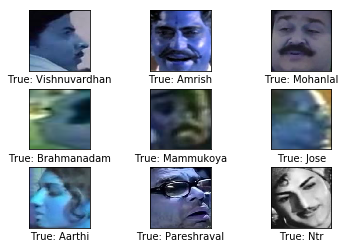

In [8]:
# Get some random images and their labels from the train set.

images, cls_true  = data.train.images, data.train.cls

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [9]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [10]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [11]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [12]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [13]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [14]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [15]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [16]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [17]:
y_true_cls = tf.argmax(y_true, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [18]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

In [19]:
layer_conv1

<tf.Tensor 'Relu:0' shape=(?, 100, 100, 32) dtype=float32>

In [20]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

In [21]:
layer_conv2

<tf.Tensor 'Relu_1:0' shape=(?, 50, 50, 32) dtype=float32>

In [22]:
layer_conv3, weights_conv3 = \
    new_conv_layer(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True)

In [23]:
layer_conv3

<tf.Tensor 'Relu_2:0' shape=(?, 25, 25, 32) dtype=float32>

In [24]:
layer_flat, num_features = flatten_layer(layer_conv3)

In [25]:
layer_flat

<tf.Tensor 'Reshape_1:0' shape=(?, 20000) dtype=float32>

In [26]:
num_features

20000

In [27]:
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

In [28]:
layer_fc1

<tf.Tensor 'Relu_3:0' shape=(?, 128) dtype=float32>

In [29]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [30]:
layer_fc2

<tf.Tensor 'add_4:0' shape=(?, 100) dtype=float32>

In [31]:
y_pred = tf.nn.softmax(layer_fc2)

In [32]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [33]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)

In [34]:
cost = tf.reduce_mean(cross_entropy)

In [35]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [36]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [37]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [38]:
session = tf.Session()

In [39]:
session.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [40]:
train_batch_size = batch_size

In [41]:
def print_progress(epoch, feed_dict_train, feed_dict_validate, val_loss):
    # Calculate the accuracy on the training-set.
    acc = session.run(accuracy, feed_dict=feed_dict_train)
    val_acc = session.run(accuracy, feed_dict=feed_dict_validate)
    msg = "Epoch {0} --- Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}, Validation Loss: {3:.3f}"
    print(msg.format(epoch + 1, acc, val_acc, val_loss))

In [42]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()
    
    best_val_loss = float("inf")
    patience = 0

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch, _, cls_batch = data.train.next_batch(train_batch_size)
        x_valid_batch, y_valid_batch, _, valid_cls_batch = data.valid.next_batch(train_batch_size)

        # Convert shape from [num examples, rows, columns, depth]
        # to [num examples, flattened image shape]

        x_batch = x_batch.reshape(train_batch_size, img_size_flat)
        x_valid_batch = x_valid_batch.reshape(train_batch_size, img_size_flat)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        
        feed_dict_validate = {x: x_valid_batch,
                              y_true: y_valid_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)
        

        # Print status at end of each epoch (defined as full pass through training dataset).
        if i % int(data.train.num_examples/batch_size) == 0: 
            val_loss = session.run(cost, feed_dict=feed_dict_validate)
            epoch = int(i / int(data.train.num_examples/batch_size))
            
            print_progress(epoch, feed_dict_train, feed_dict_validate, val_loss)
            
            if early_stopping:    
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience = 0
                else:
                    patience += 1

                if patience == early_stopping:
                    break

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time elapsed: " + str(timedelta(seconds=int(round(time_dif)))))

In [43]:
def plot_example_errors(cls_pred, correct):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.valid.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.valid.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [44]:
def plot_confusion_matrix(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.valid.cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [45]:
def print_validation_accuracy(x=x, y_true=y_true, show_example_errors=False,
                             show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(data.valid.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.valid.images[i:j, :].reshape(batch_size, img_size_flat)
        

        # Get the associated labels.
        labels = data.valid.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    cls_true = np.array(data.valid.cls)
    cls_pred = np.array([classes[x] for x in cls_pred]) 

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

Epoch 1 --- Training Accuracy:   0.0%, Validation Accuracy:   8.3%, Validation Loss: 4.591
Time elapsed: 0:00:01
Accuracy on Test-Set: 0.7% (27 / 3684)
Example errors:


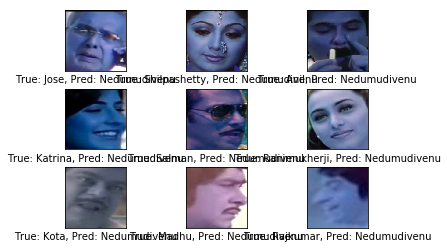

Confusion Matrix:
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


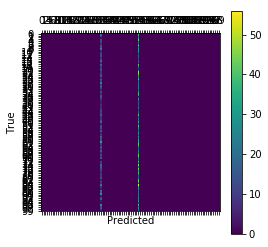

In [46]:
optimize(num_iterations=1)
print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

Time elapsed: 0:07:00
Accuracy on Test-Set: 2.9% (108 / 3684)
Example errors:


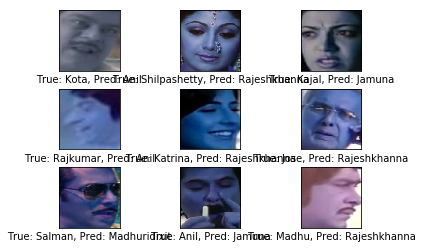

Confusion Matrix:
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


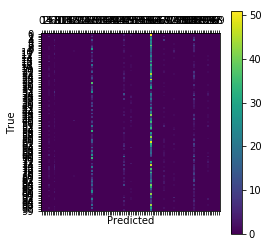

In [47]:
optimize(num_iterations=999)
print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

Epoch 2 --- Training Accuracy:  16.7%, Validation Accuracy:  16.7%, Validation Loss: 3.790
Epoch 3 --- Training Accuracy:  33.3%, Validation Accuracy:  33.3%, Validation Loss: 3.286
Epoch 4 --- Training Accuracy:  41.7%, Validation Accuracy:  33.3%, Validation Loss: 3.105
Epoch 5 --- Training Accuracy:  41.7%, Validation Accuracy:  33.3%, Validation Loss: 2.930
Time elapsed: 1:06:28
Accuracy on Test-Set: 29.1% (1071 / 3684)
Example errors:


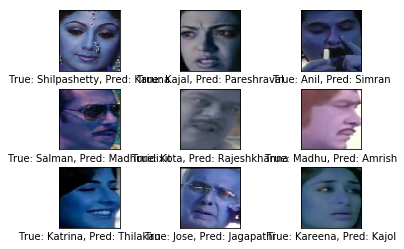

Confusion Matrix:
[[ 1  0  0 ...,  0  0  0]
 [ 0 19  0 ...,  1  1  0]
 [ 0  1  0 ...,  0  0  0]
 ..., 
 [ 0  1  0 ...,  0  0  0]
 [ 1  0  0 ...,  0  2  0]
 [ 0  0  0 ...,  0  0  7]]


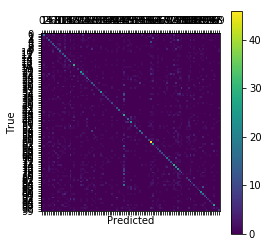

In [48]:
optimize(num_iterations=9000)
print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

Epoch 6 --- Training Accuracy:  41.7%, Validation Accuracy:  25.0%, Validation Loss: 2.833
Epoch 7 --- Training Accuracy:  33.3%, Validation Accuracy:  25.0%, Validation Loss: 2.747
Epoch 8 --- Training Accuracy:  41.7%, Validation Accuracy:  25.0%, Validation Loss: 2.724
Epoch 9 --- Training Accuracy:  41.7%, Validation Accuracy:  33.3%, Validation Loss: 2.723
Epoch 10 --- Training Accuracy:  58.3%, Validation Accuracy:  33.3%, Validation Loss: 2.690
Time elapsed: 1:10:49
Accuracy on Test-Set: 36.8% (1357 / 3684)
Example errors:


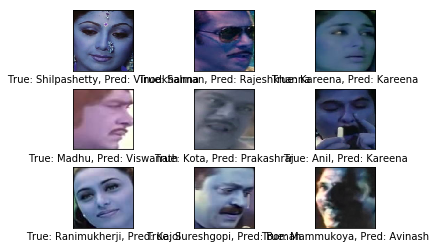

Confusion Matrix:
[[ 3  0  0 ...,  0  1  0]
 [ 0 14  0 ...,  1  0  0]
 [ 0  0  5 ...,  0  1  0]
 ..., 
 [ 0  1  0 ...,  4  0  0]
 [ 0  0  0 ...,  0  9  0]
 [ 0  0  0 ...,  0  0 14]]


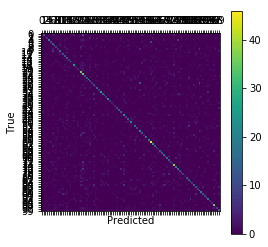

In [49]:
optimize(num_iterations=10000)
print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

Epoch 11 --- Training Accuracy:  58.3%, Validation Accuracy:  41.7%, Validation Loss: 2.693
Epoch 12 --- Training Accuracy:  58.3%, Validation Accuracy:  41.7%, Validation Loss: 2.693
Epoch 13 --- Training Accuracy:  75.0%, Validation Accuracy:  41.7%, Validation Loss: 2.670
Epoch 14 --- Training Accuracy:  75.0%, Validation Accuracy:  41.7%, Validation Loss: 2.667
Time elapsed: 1:12:13
Accuracy on Test-Set: 41.4% (1525 / 3684)
Example errors:


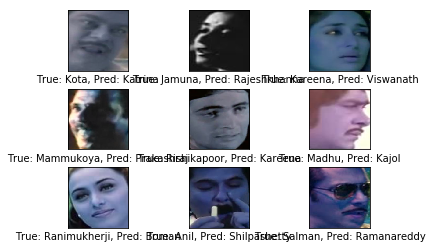

Confusion Matrix:
[[ 3  0  0 ...,  0  2  0]
 [ 0 20  0 ...,  1  0  0]
 [ 0  0 13 ...,  0  0  0]
 ..., 
 [ 0  1  0 ...,  1  0  1]
 [ 0  0  1 ...,  0 11  0]
 [ 0  0  0 ...,  0  0 20]]


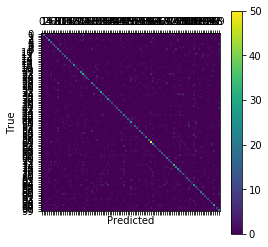

In [50]:
optimize(num_iterations=10000)
print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

Epoch 15 --- Training Accuracy:  75.0%, Validation Accuracy:  33.3%, Validation Loss: 2.680
Epoch 16 --- Training Accuracy:  83.3%, Validation Accuracy:  33.3%, Validation Loss: 2.712
Epoch 17 --- Training Accuracy:  83.3%, Validation Accuracy:  33.3%, Validation Loss: 2.751
Epoch 18 --- Training Accuracy:  83.3%, Validation Accuracy:  33.3%, Validation Loss: 2.810
Epoch 19 --- Training Accuracy:  83.3%, Validation Accuracy:  33.3%, Validation Loss: 2.837
Time elapsed: 1:11:10
Accuracy on Test-Set: 41.4% (1526 / 3684)
Example errors:


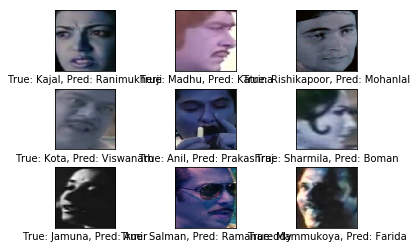

Confusion Matrix:
[[ 4  0  0 ...,  0  1  0]
 [ 0 32  0 ...,  0  1  0]
 [ 0  1  9 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  5  0  0]
 [ 0  0  1 ...,  0 11  0]
 [ 0  0  0 ...,  2  0 15]]


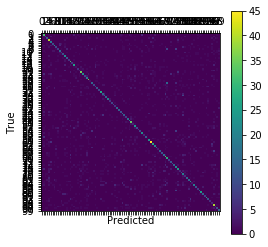

In [51]:
optimize(num_iterations=10000)
print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

In [ ]:
#optimize(num_iterations=2000)
#print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

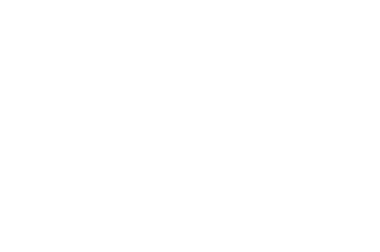

In [71]:
plt.axis('off')

test_Shahrukhkhan = cv2.imread('Shahrukhkhan.10028.jpg')

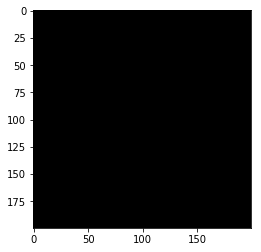

In [78]:
test_Shahrukhkhan = cv2.resize(src=test_Shahrukhkhan, dsize=(img_size, img_size), interpolation=cv2.INTER_LINEAR) / 255

preview_Shahrukhkhan = plt.imshow(test_Shahrukhkhan.reshape(img_size, img_size, num_channels))

In [76]:
print cv2.imshow('Shahrukhkhan.10028.jpg',test_Shahrukhkhan)

None


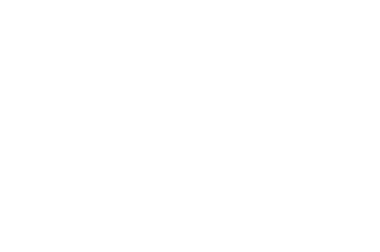

In [58]:
plt.axis('off')

test_Amitabh = cv2.imread('Amitabh.10027.jpg')

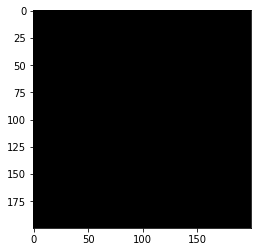

In [59]:
test_Amitabh = cv2.resize(test_Amitabh, (img_size, img_size), interpolation=cv2.INTER_LINEAR) / 255

preview_Amitabh = plt.imshow(test_Amitabh.reshape(img_size, img_size, num_channels))

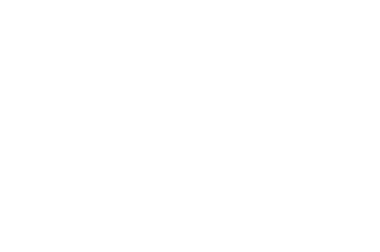

In [60]:
plt.axis('off')

test_Shilpashetty = cv2.imread('Shilpashetty.10042.jpg')

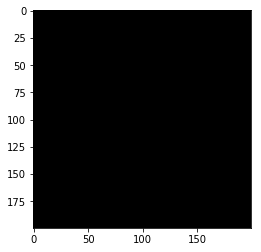

In [61]:
test_Shilpashetty = cv2.resize(test_Shilpashetty, (img_size, img_size), interpolation=cv2.INTER_LINEAR) / 255

preview_Shilpashetty = plt.imshow(test_Shilpashetty.reshape(img_size, img_size, num_channels))

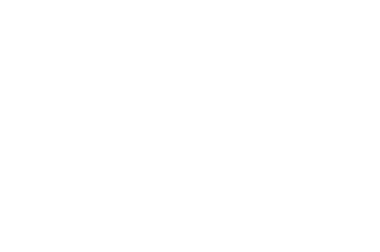

In [62]:
plt.axis('off')

test_Kareena = cv2.imread('Kareena.10010.jpg')

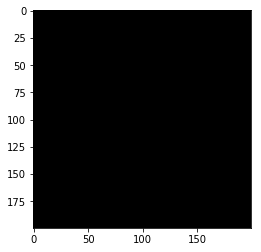

In [63]:
test_Kareena = cv2.resize(test_Kareena, (img_size, img_size), interpolation=cv2.INTER_LINEAR) / 255

preview_Kareena = plt.imshow(test_Kareena.reshape(img_size, img_size, num_channels))

In [70]:
def sample_prediction(test_im):
    feed_dict_test = {
        x: test_im.reshape(1, img_size_flat),
        y_true: np.array([[1, 0]])
    }
    test_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    return classes[test_pred[0]]

print ("Predicted class for test_Shahrukhkhan: {}".format(sample_prediction(test_Shahrukhkhan)))
print ("Predicted class for test_Shilpashetty: {}".format(sample_prediction(test_Shilpashetty)))

ValueError: Cannot feed value of shape (1, 2) for Tensor u'y_true:0', which has shape '(?, 100)'

In [ ]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [ ]:
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.
    
    image = image.reshape(img_size_flat)

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {x: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = session.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [ ]:
def plot_image(image):
    plt.imshow(image.reshape(img_size, img_size, num_channels),
               interpolation='nearest')
    plt.show()

In [ ]:
image076 = test_images[76]
plot_image(image076)

In [ ]:
image079 = test_images[79]
plot_image(image079)

In [ ]:
plot_conv_weights(weights=weights_conv1)

In [ ]:
plot_conv_layer(layer=layer_conv1, image=image076)

In [ ]:
plot_conv_layer(layer=layer_conv1, image=image079)

In [ ]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

In [ ]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

In [ ]:
plot_conv_layer(layer=layer_conv2, image=image076)

In [ ]:
plot_conv_layer(layer=layer_conv2, image=image079)

In [ ]:
def write_predictions(ims, ids):
    ims = ims.reshape(ims.shape[0], img_size_flat)
    preds = session.run(y_pred, feed_dict={x: ims})
    result = pd.DataFrame(preds, columns=classes)
    result.loc[:, 'id'] = pd.Series(ids, index=result.index)
    pred_file = 'predictions.csv'
    result.to_csv(pred_file, index=False)
    
write_predictions(test_images, test_ids)

In [ ]:
session.close()